# LGBM
Light Gradient Boosted Machine

## lightgbm 설치

In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade pip

In [57]:
import lightgbm as lgb

In [5]:
import pandas as pd

## 파일 불러오기 2019년 1월 ~ 12월  baseline

In [500]:
df=pd.read_csv('/Users/bomi/bigcon_personal/base_line_bomi.csv')

In [501]:
df

Unnamed: 0  m_code  p_code p_group  unit_price  sales  YEAR  MONTH  \
0               0  100346  201072      의류       39900     53  2019      1   
1               1  100346  201079      의류       39900    110  2019      1   
2               2  100346  201072      의류       39900     82  2019      1   
3               3  100346  201079      의류       39900    174  2019      1   
4               4  100346  201072      의류       39900    167  2019      1   
...           ...     ...     ...     ...         ...    ...   ...    ...   
35374       35374  100448  201391      주방      148000     69  2019     12   
35375       35375  100448  201383      주방      178000    286  2019     12   
35376       35376  100448  201390      주방      168000    621  2019     12   
35377       35377  100448  201384      주방      158000     87  2019     12   
35378       35378  100448  201391      주방      148000    315  2019     12   

       DAY  HOUR  MINUTE  code     mask   parcel  rain  humidity  sunshine  \
0        1     6       0     0  0.04095  0.52582   0.0      60.0       0.0   
1        1     6       0     0  0.04095  0.52582   0.0      60.0       0.0   
2        1     6      20     0  0.04095  0.52582   0.0      60.0       0.0   
3        1     6      20     0  0.04095  0.52582   0.0      60.0       0.0   
4        1     6      40     0  0.04095  0.52582   0.0      60.0       0.0   
...    ...   ...     ...   ...      ...      ...   ...       ...       ...   
35374   31    23      40  6858  0.03906  1.28643   0.0      45.0       0.0   
35375   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35376   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35377   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35378   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   

       total_price  
0          2099000  
1          4371000  
2          3262000  
3          6955000  
4          6672000  
...            ...  
35374     10157000  
35375     50929000  
35376    104392000  
35377     13765000  
35378     46608000  

[35379 rows x 18 columns]

In [9]:
del df['Unnamed: 0']

In [503]:
df

Unnamed: 0  m_code  p_code p_group  unit_price  sales  YEAR  MONTH  \
0               0  100346  201072      의류       39900     53  2019      1   
1               1  100346  201079      의류       39900    110  2019      1   
2               2  100346  201072      의류       39900     82  2019      1   
3               3  100346  201079      의류       39900    174  2019      1   
4               4  100346  201072      의류       39900    167  2019      1   
...           ...     ...     ...     ...         ...    ...   ...    ...   
35374       35374  100448  201391      주방      148000     69  2019     12   
35375       35375  100448  201383      주방      178000    286  2019     12   
35376       35376  100448  201390      주방      168000    621  2019     12   
35377       35377  100448  201384      주방      158000     87  2019     12   
35378       35378  100448  201391      주방      148000    315  2019     12   

       DAY  HOUR  MINUTE  code     mask   parcel  rain  humidity  sunshine  \
0        1     6       0     0  0.04095  0.52582   0.0      60.0       0.0   
1        1     6       0     0  0.04095  0.52582   0.0      60.0       0.0   
2        1     6      20     0  0.04095  0.52582   0.0      60.0       0.0   
3        1     6      20     0  0.04095  0.52582   0.0      60.0       0.0   
4        1     6      40     0  0.04095  0.52582   0.0      60.0       0.0   
...    ...   ...     ...   ...      ...      ...   ...       ...       ...   
35374   31    23      40  6858  0.03906  1.28643   0.0      45.0       0.0   
35375   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35376   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35377   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   
35378   31     0       0  6858  0.03906  1.28643   0.0      66.0       0.0   

       total_price  
0          2099000  
1          4371000  
2          3262000  
3          6955000  
4          6672000  
...            ...  
35374     10157000  
35375     50929000  
35376    104392000  
35377     13765000  
35378     46608000  

[35379 rows x 18 columns]

In [49]:
# 상품군 카테고리컬 변수로 바꾸기
df['p_group']=pd.Categorical(df['p_group']).codes

In [21]:
df

m_code  p_code  p_group  unit_price  sales  YEAR  MONTH  DAY  HOUR  \
0      100346  201072        6       39900     53  2019      1    1     6   
1      100346  201079        6       39900    110  2019      1    1     6   
2      100346  201072        6       39900     82  2019      1    1     6   
3      100346  201079        6       39900    174  2019      1    1     6   
4      100346  201072        6       39900    167  2019      1    1     6   
...       ...     ...      ...         ...    ...   ...    ...  ...   ...   
35374  100448  201391        9      148000     69  2019     12   31    23   
35375  100448  201383        9      178000    286  2019     12   31     0   
35376  100448  201390        9      168000    621  2019     12   31     0   
35377  100448  201384        9      158000     87  2019     12   31     0   
35378  100448  201391        9      148000    315  2019     12   31     0   

       MINUTE  code     mask   parcel  rain  humidity  sunshine  total_price  
0           0     0  0.04095  0.52582   0.0      60.0       0.0      2099000  
1           0     0  0.04095  0.52582   0.0      60.0       0.0      4371000  
2          20     0  0.04095  0.52582   0.0      60.0       0.0      3262000  
3          20     0  0.04095  0.52582   0.0      60.0       0.0      6955000  
4          40     0  0.04095  0.52582   0.0      60.0       0.0      6672000  
...       ...   ...      ...      ...   ...       ...       ...          ...  
35374      40  6858  0.03906  1.28643   0.0      45.0       0.0     10157000  
35375       0  6858  0.03906  1.28643   0.0      66.0       0.0     50929000  
35376       0  6858  0.03906  1.28643   0.0      66.0       0.0    104392000  
35377       0  6858  0.03906  1.28643   0.0      66.0       0.0     13765000  
35378       0  6858  0.03906  1.28643   0.0      66.0       0.0     46608000  

[35379 rows x 17 columns]

분기별 실적 칼럼 추가

In [ ]:
# 농수축 이미용 가전 건강기능 의류 속옷 주방 침구 생활용품 잡화 가구

In [ ]:
# # 분기 실적 (이렇게 하는 방법 뿐일까...? ㅎ...)
# # 1분기
# first=[1,2,3]
# second=[4,5,6]
# third=[7,8,9]
# forth=[10,11,12]
# def add_quarter_record_feature(season,total_price,health,food,cos_hair,apparel,hous,elec,etc):
#     health_price=total_price*health/100
#     food_price=total_price*food/100
#     cos_hair_price=total_price*cos_hair/100
#     apparel_price=total_price*apparel/100
#     house_price=total_price*house/100
#     elec_price=total_price*elec/100
#     etc_price=total_price*etc/100

In [255]:
first=3402
second=3397
third=3383
forth=3377

first_list=[1,2,3]
second_list=[4,5,6]
third_list=[7,8,9]
forth_list=[10,11,12]

In [262]:
first=3402
second=3397
third=3383
forth=3377

first_list=[1,2,3]
second_list=[4,5,6]
third_list=[7,8,9]
forth_list=[10,11,12]

def quarter_allocation(x):
    if x in first_list:
        return 3402
    elif x in second_list:
        return 3397
    elif x in third_list:
        return 3383
    else:
        return 3377
# lambda x: 'True' if x <= 4 else 'False'
df['quarter']=df['MONTH'].apply(lambda x: quarter_allocation(x))

In [263]:
df

m_code  p_code  p_group  unit_price  sales  YEAR  MONTH  DAY  HOUR  \
0      100346  201072        6       39900     53  2019      1    1     6   
1      100346  201079        6       39900    110  2019      1    1     6   
2      100346  201072        6       39900     82  2019      1    1     6   
3      100346  201079        6       39900    174  2019      1    1     6   
4      100346  201072        6       39900    167  2019      1    1     6   
...       ...     ...      ...         ...    ...   ...    ...  ...   ...   
35374  100448  201391        9      148000     69  2019     12   31    23   
35375  100448  201383        9      178000    286  2019     12   31     0   
35376  100448  201390        9      168000    621  2019     12   31     0   
35377  100448  201384        9      158000     87  2019     12   31     0   
35378  100448  201391        9      148000    315  2019     12   31     0   

       MINUTE  code     mask   parcel  rain  humidity  sunshine  total_price  \
0           0     0  0.04095  0.52582   0.0      60.0       0.0      2099000   
1           0     0  0.04095  0.52582   0.0      60.0       0.0      4371000   
2          20     0  0.04095  0.52582   0.0      60.0       0.0      3262000   
3          20     0  0.04095  0.52582   0.0      60.0       0.0      6955000   
4          40     0  0.04095  0.52582   0.0      60.0       0.0      6672000   
...       ...   ...      ...      ...   ...       ...       ...          ...   
35374      40  6858  0.03906  1.28643   0.0      45.0       0.0     10157000   
35375       0  6858  0.03906  1.28643   0.0      66.0       0.0     50929000   
35376       0  6858  0.03906  1.28643   0.0      66.0       0.0    104392000   
35377       0  6858  0.03906  1.28643   0.0      66.0       0.0     13765000   
35378       0  6858  0.03906  1.28643   0.0      66.0       0.0     46608000   

       quarter  
0         3402  
1         3402  
2         3402  
3         3402  
4         3402  
...        ...  
35374     3377  
35375     3377  
35376     3377  
35377     3377  
35378     3377  

[35379 rows x 18 columns]

In [284]:
del df['sales']

In [286]:
del df['YEAR']

In [411]:
del df['code']

In [412]:
df=df[['m_code', 'p_code', 'p_group', 'unit_price', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'mask', 'parcel', 'rain', 'humidity', 'sunshine',
        'quarter','total_price']]

In [413]:
df

m_code  p_code  p_group  unit_price  MONTH  DAY  HOUR  MINUTE     mask  \
0      100346  201072        6       39900      1    1     6       0  0.04095   
1      100346  201079        6       39900      1    1     6       0  0.04095   
2      100346  201072        6       39900      1    1     6      20  0.04095   
3      100346  201079        6       39900      1    1     6      20  0.04095   
4      100346  201072        6       39900      1    1     6      40  0.04095   
...       ...     ...      ...         ...    ...  ...   ...     ...      ...   
35374  100448  201391        9      148000     12   31    23      40  0.03906   
35375  100448  201383        9      178000     12   31     0       0  0.03906   
35376  100448  201390        9      168000     12   31     0       0  0.03906   
35377  100448  201384        9      158000     12   31     0       0  0.03906   
35378  100448  201391        9      148000     12   31     0       0  0.03906   

        parcel  rain  humidity  sunshine  quarter  total_price  
0      0.52582   0.0      60.0       0.0     3402      2099000  
1      0.52582   0.0      60.0       0.0     3402      4371000  
2      0.52582   0.0      60.0       0.0     3402      3262000  
3      0.52582   0.0      60.0       0.0     3402      6955000  
4      0.52582   0.0      60.0       0.0     3402      6672000  
...        ...   ...       ...       ...      ...          ...  
35374  1.28643   0.0      45.0       0.0     3377     10157000  
35375  1.28643   0.0      66.0       0.0     3377     50929000  
35376  1.28643   0.0      66.0       0.0     3377    104392000  
35377  1.28643   0.0      66.0       0.0     3377     13765000  
35378  1.28643   0.0      66.0       0.0     3377     46608000  

[35379 rows x 15 columns]

In [467]:
print('1분기:',df.groupby(['MONTH']).agg({'total_price':['sum']})[:3].sum())
print('2분기:',df.groupby(['MONTH']).agg({'total_price':['sum']})[3:6].sum())
print('3분기:',df.groupby(['MONTH']).agg({'total_price':['sum']})[6:9].sum())

1분기: total_price  sum    193065071000
dtype: int64
2분기: total_price  sum    196024180000
dtype: int64
3분기: total_price  sum    205376897000
dtype: int64


In [414]:
# 학습용과 테스트용 나누기
df_eval=df[df['MONTH']==6]
df_train=df[df['MONTH']!=6]

In [480]:
import math
df['total_log']=df['total_price'].apply(lambda x: math.log(x))

In [482]:
df

m_code  p_code  p_group  unit_price  MONTH  DAY  HOUR  MINUTE     mask  \
0      100346  201072        6       39900      1    1     6       0  0.04095   
1      100346  201079        6       39900      1    1     6       0  0.04095   
2      100346  201072        6       39900      1    1     6      20  0.04095   
3      100346  201079        6       39900      1    1     6      20  0.04095   
4      100346  201072        6       39900      1    1     6      40  0.04095   
...       ...     ...      ...         ...    ...  ...   ...     ...      ...   
35374  100448  201391        9      148000     12   31    23      40  0.03906   
35375  100448  201383        9      178000     12   31     0       0  0.03906   
35376  100448  201390        9      168000     12   31     0       0  0.03906   
35377  100448  201384        9      158000     12   31     0       0  0.03906   
35378  100448  201391        9      148000     12   31     0       0  0.03906   

        parcel  rain  humidity  sunshine  quarter  total_price  total_log  
0      0.52582   0.0      60.0       0.0     3402      2099000  14.556972  
1      0.52582   0.0      60.0       0.0     3402      4371000  15.290502  
2      0.52582   0.0      60.0       0.0     3402      3262000  14.997851  
3      0.52582   0.0      60.0       0.0     3402      6955000  15.754971  
4      0.52582   0.0      60.0       0.0     3402      6672000  15.713430  
...        ...   ...       ...       ...      ...          ...        ...  
35374  1.28643   0.0      45.0       0.0     3377     10157000  16.133674  
35375  1.28643   0.0      66.0       0.0     3377     50929000  17.745943  
35376  1.28643   0.0      66.0       0.0     3377    104392000  18.463664  
35377  1.28643   0.0      66.0       0.0     3377     13765000  16.437640  
35378  1.28643   0.0      66.0       0.0     3377     46608000  17.657283  

[35379 rows x 16 columns]

(array([9.0000e+00, 6.1000e+01, 2.3100e+02, 1.3370e+03, 4.1950e+03,
        7.9790e+03, 1.0954e+04, 9.1420e+03, 1.4450e+03, 2.6000e+01]),
 array([11.54248427, 12.34724485, 13.15200542, 13.956766  , 14.76152658,
        15.56628716, 16.37104774, 17.17580832, 17.9805689 , 18.78532947,
        19.59009005]),
 <a list of 10 Patch objects>)

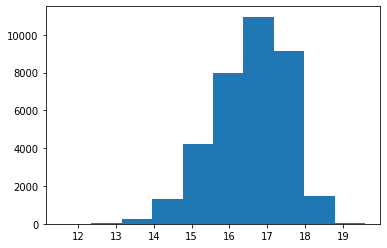

In [481]:
plt.hist(df['total_log'])

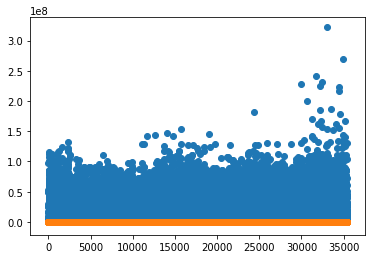

In [491]:
plt.scatter(df.index,df['total_price'])
plt.scatter(df.index,df['total_log'])

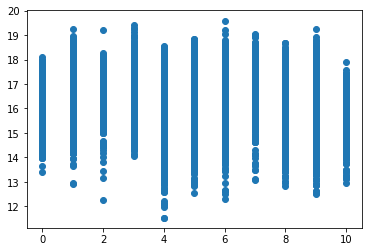

In [493]:
plt.scatter(df.p_group,df['total_log'])

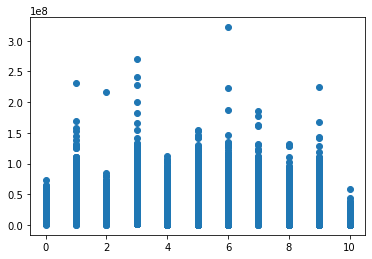

In [490]:
plt.scatter(df.p_group,df['total_price'])

(array([2.633e+04, 7.587e+03, 1.247e+03, 1.700e+02, 2.700e+01, 9.000e+00,
        4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([1.030000e+05, 3.229360e+07, 6.448420e+07, 9.667480e+07,
        1.288654e+08, 1.610560e+08, 1.932466e+08, 2.254372e+08,
        2.576278e+08, 2.898184e+08, 3.220090e+08]),
 <a list of 10 Patch objects>)

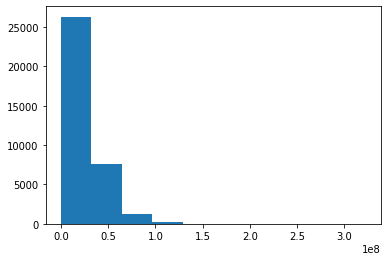

In [489]:
plt.hist(df['total_price'])

In [415]:
df_eval

m_code  p_code  p_group  unit_price  MONTH  DAY  HOUR  MINUTE     mask  \
14926  100219  200767        8       59000      6    1     6       0  0.01701   
14927  100219  200767        8       59000      6    1     6      20  0.01701   
14928  100219  200767        8       59000      6    1     6      40  0.01701   
14929  100460  201420        6       49000      6    1     7       0  0.01701   
14930  100460  201420        6       49000      6    1     7      20  0.01701   
...       ...     ...      ...         ...    ...  ...   ...     ...      ...   
17781  100074  200202        7       39800      6   30     0      20  0.01511   
17782  100074  200202        7       39800      6   30     0      40  0.01511   
17783  100074  200202        7       39800      6   30     1       0  0.01511   
17784  100841  202484        3       32900      6   30     1      20  0.01511   
17785  100841  202484        3       32900      6   30     1      40  0.01511   

        parcel  rain  humidity  sunshine  quarter  total_price  
14926  0.47221   0.0      77.0       0.0     3397     11954000  
14927  0.47221   0.0      77.0       0.0     3397     15705000  
14928  0.47221   0.0      77.0       0.0     3397     21884000  
14929  0.47221   0.0      72.0       0.0     3397     11685000  
14930  0.47221   0.0      72.0       0.0     3397     27955000  
...        ...   ...       ...       ...      ...          ...  
17781  0.21016   0.0      71.0       0.0     3397     21560000  
17782  0.21016   0.0      71.0       0.0     3397     34503000  
17783  0.21016   0.0      77.0       0.0     3397     22667000  
17784  0.21016   0.0      77.0       0.0     3397     14651000  
17785  0.21016   0.0      77.0       0.0     3397     20001000  

[2860 rows x 15 columns]

#### 날씨, 마스크, 택배 등 추가 변수에 대하여 binary categorical로 변환하지 않았음

## dataset 나누기

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
import numpy as np

In [418]:
from lightgbm import LGBMRegressor,plot_importance

numpy array로 변환

In [419]:
df_eval_np=np.array(df_eval)
df_train_np=np.array(df_train)

In [420]:
print(df_eval_np.shape,df_train_np.shape)

(2860, 15) (32519, 15)


피처와 타겟 나누기

In [421]:
eval_cols=df_eval_np[:,:-1]
eval_target=df_eval_np[:,-1]

train_cols=df_train_np[:,:-1]
train_target=df_train_np[:,-1]

In [422]:
train_x, test_x, train_y, test_y = train_test_split(train_cols, train_target, test_size=0.1)

In [423]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(29267, 14) (3252, 14) (29267,) (3252,)


In [424]:
print(eval_cols.shape,eval_target.shape)

(2860, 14) (2860,)


In [425]:
lgbm_r=LGBMRegressor()

In [426]:
# 11달 치 꺼를 학습시켜서 남은 한달 치를 테스트

----

k-fold cv 시도 but fail (나중에 재시도!)

In [42]:
# from sklearn.model_selection import KFold

In [44]:
# x=df_np[:,:-1]
# y=df_np[:,-1]

In [45]:
# kf=KFold(n_splits=5)

In [46]:
# kf.split(x)

<generator object _BaseKFold.split at 0x7fdd38939dd0>

In [47]:
# for train_index, test_index in kf.split(x):
#     print('train:',train_index,'test:',test_index)

train: [ 7076  7077  7078 ... 35376 35377 35378] test: [   0    1    2 ... 7073 7074 7075]
train: [    0     1     2 ... 35376 35377 35378] test: [ 7076  7077  7078 ... 14149 14150 14151]
train: [    0     1     2 ... 35376 35377 35378] test: [14152 14153 14154 ... 21225 21226 21227]
train: [    0     1     2 ... 35376 35377 35378] test: [21228 21229 21230 ... 28301 28302 28303]
train: [    0     1     2 ... 28301 28302 28303] test: [28304 28305 28306 ... 35376 35377 35378]


In [48]:
# for train_index, test_index in kf.split(y):
#     print('train:',train_index,'test:',test_index)

train: [ 7076  7077  7078 ... 35376 35377 35378] test: [   0    1    2 ... 7073 7074 7075]
train: [    0     1     2 ... 35376 35377 35378] test: [ 7076  7077  7078 ... 14149 14150 14151]
train: [    0     1     2 ... 35376 35377 35378] test: [14152 14153 14154 ... 21225 21226 21227]
train: [    0     1     2 ... 35376 35377 35378] test: [21228 21229 21230 ... 28301 28302 28303]
train: [    0     1     2 ... 28301 28302 28303] test: [28304 28305 28306 ... 35376 35377 35378]


--------------

파라미터 지정

In [475]:
# 첫시도이고, 잘 몰라서 대표적인 값으로 선정함.
# # regression, loss_metric은 mape(채점기준)으로
# params = {'learning_rate': 0.01, 
#           'max_depth': 16, 
#           'boosting': 'gbdt', 
#           'objective': 'regression', 
#           'metric': 'mape', 
#           'num_leaves': 144, 
#           'feature_fraction': 0.9, 
#           'bagging_fraction': 0.7, 
#           'bagging_freq': 5}


params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'regression',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.01,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'mape'}


In [ ]:
# Create parameters to search
gridParams = {
    'learning_rate': [0.005,0.1,0.001],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }


In [ ]:
# Create regressor to use. Note that parameters have to be input manually
# not as a dict!
model = lgb.LGBMRegressor(boosting_type= 'gbdt',
          objective = 'regression',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# To view the default model params:
mdl.get_params().keys()

In [ ]:
# Create the grid
grid = GridSearchCV(mdl, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)

In [ ]:
# Run the grid
grid.fit(allTrainData, allTrainLabels)

In [427]:
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

In [ ]:
# Kit k models with early-stopping on different training/validation splits
k = 4
predsValid = 0
predsTrain = 0
predsTest = 0
for i in range(0, k):
    print('Fitting model', k)

    # Prepare the data set for fold
    trainData, validData = train_test_split(train,
                                            test_size=0.2)
    trainDataL, trainLabels, trainIDs, trainData = prepLGB(trainData)
    validDataL, validLabels, validIDs, validData = prepLGB(validData)
    # Train
    gbm = lgb.train(params,
                    trainDataL,
                    100000,
                    valid_sets=[trainDataL, validDataL],
                    early_stopping_rounds=50,
                    verbose_eval=4)

    # Plot importance
    lgb.plot_importance(gbm)
    plt.show()

    # Predict
    predsValid += gbm.predict(validData,
                              num_iteration=gbm.best_iteration)/k
    predsTrain += gbm.predict(trainData,
                              num_iteration=gbm.best_iteration)/k
    predsTest += gbm.predict(testData,
                             num_iteration=gbm.best_iteration)/k

# Print assessment
# assessMod(predsTrain, trainLabels, predsValid=predsValid, yValid= validLabels,
#           report=True, plot=True)

# Save submission
sub = pd.DataFrame()
sub['PassengerId'] = test['PassengerId']
sub['Survived'] = np.int32(predsTest > 0.5)
sub.to_csv('sub2.csv',
           index=False)


In [428]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [429]:
train_ds

In [432]:
model = lgb.train(params, train_ds, 10000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1434
[LightGBM] [Info] Number of data points in the train set: 29267, number of used features: 14
[LightGBM] [Info] Start training from score 23024063.246113
Training until validation scores don't improve for 100 rounds
[100]	valid_0's mape: 1.35938
[200]	valid_0's mape: 1.06745
[300]	valid_0's mape: 0.915222
[400]	valid_0's mape: 0.825738
[500]	valid_0's mape: 0.762725
[600]	valid_0's mape: 0.716263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's mape: 0.683626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [433]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [373]:
predict_test

array([14093445.85679139, 45625389.3625639 , 38288908.98098783, ...,
       76691396.74110441, 18452502.24652207, 32597158.53560513])

In [374]:
test_y

array([ 5094000., 55968000., 34628000., ..., 72043000., 14253000.,
       33785000.])

In [375]:
test_y.shape

(3252,)

In [376]:
idx=np.array(range(len(test_y)))

In [377]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [445]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final_result.index, y=final_result['label'], name="test_y"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final_result.index, y=final_result['predict'], name="pred_y"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="test_y, pred_y differences visualization"
)


fig.show()

In [446]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=np.array(range(len(train_y))), y=train_y, name="train_y"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=np.array(range(len(train_y))), y=predict_train, name="predict_train"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="train_y, pred_y differences visualization"
)


fig.show()

In [436]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
print('test_mse:',mse,'r2:',r2)


test_mse: 106233801167454.56 r2: 0.7594758650791287


In [437]:
mse_train = mean_squared_error(train_y, predict_train)
r2_train = r2_score(train_y, predict_train)
print('train_mse:',mse_train,'r2:',r2_train)

train_mse: 24321163303344.58 r2: 0.9390402231292954


In [438]:
final_result = pd.concat([pd.DataFrame(test_y), pd.DataFrame(predict_test)], axis = 1)

In [439]:
final_result.columns = ['label','predict']

In [440]:
final_result['index']=final_result.index

In [441]:
import seaborn as sns

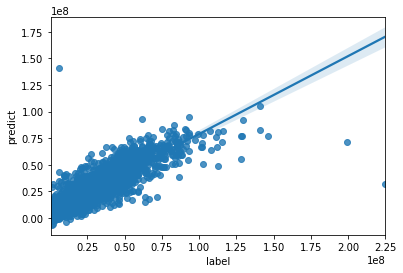

In [442]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

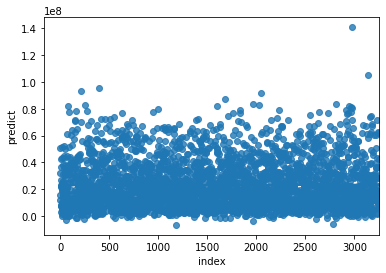

In [443]:
sns.regplot(x = 'index', y = 'predict', data = final_result)

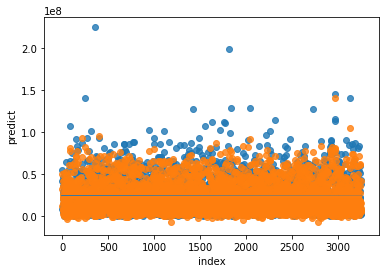

In [444]:
sns.regplot(x = 'index', y = 'label', data = final_result)
sns.regplot(x = 'index', y = 'predict', data = final_result)

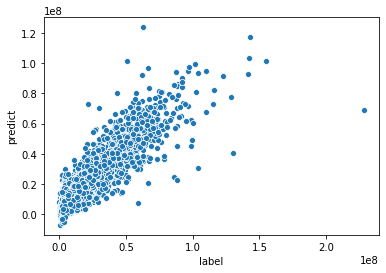

In [398]:
sns.scatterplot(x = 'label', y = 'predict', data = final_result)

In [399]:
final_result_short=final_result.iloc[1200:1300,:-1]

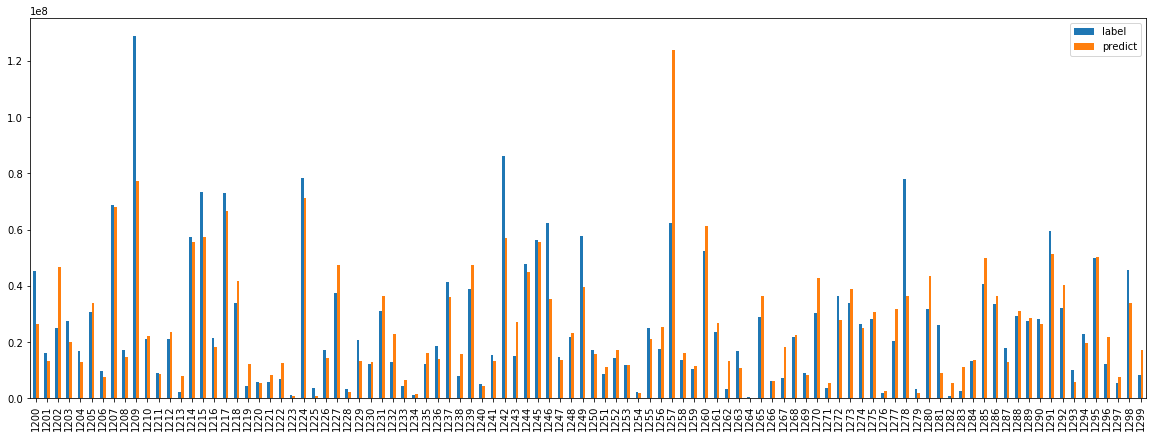

In [447]:
final_result_short.plot(kind='bar',figsize=(20, 7))


In [401]:
l=final_result.iloc[1131,1]
l

14890858.156219823

In [402]:
p=final_result.iloc[1131,0]
p

10441000.0

In [403]:
l-p

4449858.156219823

In [404]:
(l-p)/l*100

29.883154547148404

In [405]:
df

m_code  p_code  p_group  unit_price  MONTH  DAY  HOUR  MINUTE  code  \
0      100346  201072        6       39900      1    1     6       0     0   
1      100346  201079        6       39900      1    1     6       0     0   
2      100346  201072        6       39900      1    1     6      20     0   
3      100346  201079        6       39900      1    1     6      20     0   
4      100346  201072        6       39900      1    1     6      40     0   
...       ...     ...      ...         ...    ...  ...   ...     ...   ...   
35374  100448  201391        9      148000     12   31    23      40  6858   
35375  100448  201383        9      178000     12   31     0       0  6858   
35376  100448  201390        9      168000     12   31     0       0  6858   
35377  100448  201384        9      158000     12   31     0       0  6858   
35378  100448  201391        9      148000     12   31     0       0  6858   

          mask   parcel  rain  humidity  sunshine  quarter  total_price  
0      0.04095  0.52582   0.0      60.0       0.0     3402      2099000  
1      0.04095  0.52582   0.0      60.0       0.0     3402      4371000  
2      0.04095  0.52582   0.0      60.0       0.0     3402      3262000  
3      0.04095  0.52582   0.0      60.0       0.0     3402      6955000  
4      0.04095  0.52582   0.0      60.0       0.0     3402      6672000  
...        ...      ...   ...       ...       ...      ...          ...  
35374  0.03906  1.28643   0.0      45.0       0.0     3377     10157000  
35375  0.03906  1.28643   0.0      66.0       0.0     3377     50929000  
35376  0.03906  1.28643   0.0      66.0       0.0     3377    104392000  
35377  0.03906  1.28643   0.0      66.0       0.0     3377     13765000  
35378  0.03906  1.28643   0.0      66.0       0.0     3377     46608000  

[35379 rows x 16 columns]

In [452]:
print('best: ',df.columns[3],df.columns[11],df.columns[1],df.columns[9])

best:  unit_price humidity p_code parcel


In [455]:
print('worst: ',df.columns[13],df.columns[10],df.columns[12])

worst:  quarter rain sunshine


sales를 넣으면 안됨 정답을 알려주는 것

상품군 별 unit price(판매단가) 격차가 큼

tv시청률 



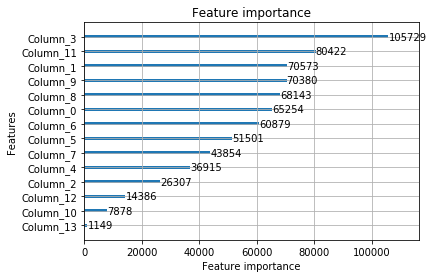

In [448]:
lgb.plot_importance(model)

In [194]:
lgb.feature_importances_

AttributeError: module 'lightgbm' has no attribute 'feature_importances_'

In [162]:
test_data=pd.read_excel('/Users/bomi/bigcon_personal/dataset/eval data/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',header=1)

In [230]:
test_data

방송일시      노출(분)    마더코드    상품코드                   상품명 상품군  \
0    2020-06-01 06:20:00  20.000000  100650  201971       잭필드 남성  반팔셔츠 4종  의류   
1    2020-06-01 06:40:00  20.000000  100650  201971       잭필드 남성  반팔셔츠 4종  의류   
2    2020-06-01 07:00:00  20.000000  100650  201971       잭필드 남성  반팔셔츠 4종  의류   
3    2020-06-01 07:20:00  20.000000  100445  202278  쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티  속옷   
4    2020-06-01 07:40:00  20.000000  100445  202278  쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티  속옷   
...                  ...        ...     ...     ...                   ...  ..   
2886 2020-07-01 00:20:00  20.000000  100660  201989       쉴렉스  안마의자 렌탈서비스  무형   
2887 2020-07-01 00:40:00  20.000000  100660  201989       쉴렉스  안마의자 렌탈서비스  무형   
2888 2020-07-01 01:00:00  20.000000  100660  201989       쉴렉스  안마의자 렌탈서비스  무형   
2889 2020-07-01 01:20:00  20.000000  100261  200875        아놀드파마 티셔츠레깅스세트  의류   
2890 2020-07-01 01:40:00  15.933333  100261  200875        아놀드파마 티셔츠레깅스세트  의류   

       판매단가  취급액  
0     59800  NaN  
1     59800  NaN  
2     59800  NaN  
3     69900  NaN  
4     69900  NaN  
...     ...  ...  
2886      0  NaN  
2887      0  NaN  
2888      0  NaN  
2889  69900  NaN  
2890  69900  NaN  

[2891 rows x 8 columns]

In [243]:
test_data['상품군']

0       의류
1       의류
2       의류
3       속옷
4       속옷
        ..
2886    무형
2887    무형
2888    무형
2889    의류
2890    의류
Name: 상품군, Length: 2891, dtype: object

In [231]:
test_data[test_data['상품군']=='무형']

방송일시  노출(분)    마더코드    상품코드                       상품명 상품군  \
21   2020-06-01 13:20:00   20.0  100570  201673          KT휴대폰_삼성갤럭시 노트10  무형   
22   2020-06-01 13:20:00    NaN  100570  201671        (특)KT휴대폰_삼성갤럭시 A31  무형   
23   2020-06-01 13:40:00   20.0  100570  201673          KT휴대폰_삼성갤럭시 노트10  무형   
24   2020-06-01 13:40:00    NaN  100570  201671        (특)KT휴대폰_삼성갤럭시 A31  무형   
25   2020-06-01 14:00:00   20.0  100570  201673          KT휴대폰_삼성갤럭시 노트10  무형   
...                  ...    ...     ...     ...                       ...  ..   
2848 2020-06-30 18:40:00   20.0  100073  200195  삼성화재 행복한파트너 주택상해윤전자(올케어)  무형   
2849 2020-06-30 19:00:00   20.0  100073  200195  삼성화재 행복한파트너 주택상해윤전자(올케어)  무형   
2886 2020-07-01 00:20:00   20.0  100660  201989           쉴렉스  안마의자 렌탈서비스  무형   
2887 2020-07-01 00:40:00   20.0  100660  201989           쉴렉스  안마의자 렌탈서비스  무형   
2888 2020-07-01 01:00:00   20.0  100660  201989           쉴렉스  안마의자 렌탈서비스  무형   

      판매단가  취급액  
21       0  NaN  
22       0  NaN  
23       0  NaN  
24       0  NaN  
25       0  NaN  
...    ...  ...  
2848     0  NaN  
2849     0  NaN  
2886     0  NaN  
2887     0  NaN  
2888     0  NaN  

[175 rows x 8 columns]

In [ ]:
params = {
    'application': 'regression', # for binary classification
#     'num_class' : 1, # used for multi-classes
    'boosting': 'gbdt', # traditional gradient boosting decision tree
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', # you can use GPU to achieve faster learning
    'max_depth': -1, # <0 means no limit
    'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
    'lambda_l1': 5, # L1 regularization
    'lambda_l2': 10, # L2 regularization
    'metric' : 'binary_error',
    'subsample_for_bin': 200, # number of samples for constructing bins
    'subsample': 1, # subsample ratio of the training instance
    'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
    'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': 5# minimum number of data needed in a leaf
}